In [44]:
# Importações

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium


import json



from src.config import CLEANED_PATH, GEO_CALIFORNIA_ORIGINAL_DIR, AGG_COUNTIES_DIR

In [3]:
# Definição do tema do seaborn
sns.set_theme(
    style="white",
    palette="bright"
)

In [4]:
# Obtendo a base de dados
df = pd.read_parquet(CLEANED_PATH)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat
0,-122.25,37.849998,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.817352,2.547945,0.184458,4,4
1,-122.25,37.849998,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.281853,2.181467,0.172096,3,4
2,-122.25,37.849998,52,919,213,413,193,4.0368,269700,NEAR BAY,4.761658,2.139896,0.231774,3,4
3,-122.25,37.840000,52,2535,489,1094,514,3.6591,299200,NEAR BAY,4.931907,2.128405,0.192899,3,4
4,-122.25,37.840000,52,3104,687,1157,647,3.1200,241400,NEAR BAY,4.797527,1.788253,0.221327,3,4


In [5]:
# Resumo da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  17340 non-null  float32
 1   latitude                   17340 non-null  float32
 2   housing_median_age         17340 non-null  int8   
 3   total_rooms                17340 non-null  int16  
 4   total_bedrooms             17340 non-null  int16  
 5   population                 17340 non-null  int16  
 6   households                 17340 non-null  int16  
 7   median_income              17340 non-null  float32
 8   median_house_value         17340 non-null  int32  
 9   ocean_proximity            17340 non-null  object 
 10  rooms_per_households       17340 non-null  float64
 11  population_per_households  17340 non-null  float64
 12  bedrooms_per_rooms         17340 non-null  float64
 13  median_income_cat          17340 non-null  int

In [6]:
# Resumo estatístico da base
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat
count,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000,17340.000000
mean,-119.619751,35.699425,28.938005,2368.008997,487.672030,1306.215340,459.771280,3.621368,187296.412803,5.209242,2.899241,0.211224,2.917474,2.282295
std,2.011689,2.160501,12.273909,1344.864596,273.676563,726.237564,253.087024,1.427621,91577.669960,1.029254,0.656502,0.044694,0.972869,0.899185
min,-124.349998,32.540001,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.714286,0.750000,0.115385,1.000000,1.000000
25%,-121.809998,33.939999,19.000000,1452.000000,296.000000,799.000000,284.000000,2.541700,113900.000000,4.462025,2.450063,0.178407,2.000000,2.000000
50%,-118.660004,34.400002,29.000000,2084.500000,428.000000,1159.000000,407.000000,3.443200,171800.000000,5.175991,2.828804,0.204072,3.000000,2.000000
75%,-118.019997,37.740002,37.000000,2990.000000,619.000000,1665.000000,583.000000,4.527800,243200.000000,5.900000,3.274911,0.238035,4.000000,3.000000
max,-114.550003,41.950001,52.000000,8301.000000,1636.000000,4383.000000,1509.000000,8.103900,453700.000000,8.269231,4.891473,0.360846,5.000000,4.000000


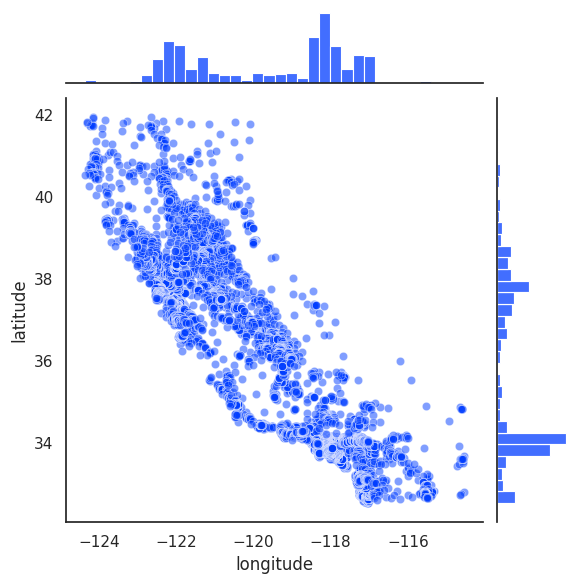

In [7]:
# Verificando o comportamento e a concentração do par longitude e latitude

sns.jointplot(
    data=df, 
    x="longitude", 
    y="latitude",
    alpha=0.5
)

plt.show()

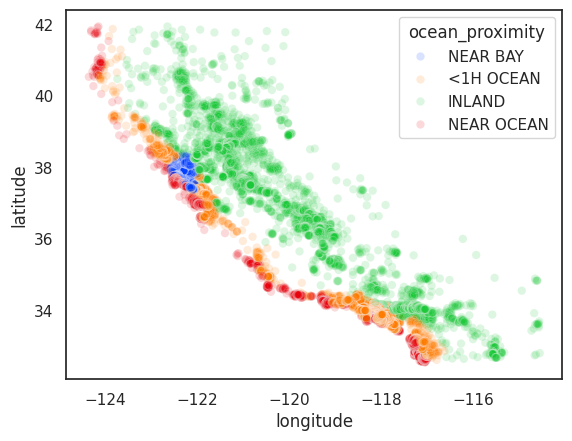

In [8]:
# Verificando o comportamento do par longitude e latitude, para cada categoria de "ocean_proximity"

fig, ax = plt.subplots()

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue="ocean_proximity",
    alpha=0.15,
    ax=ax
)

plt.show()

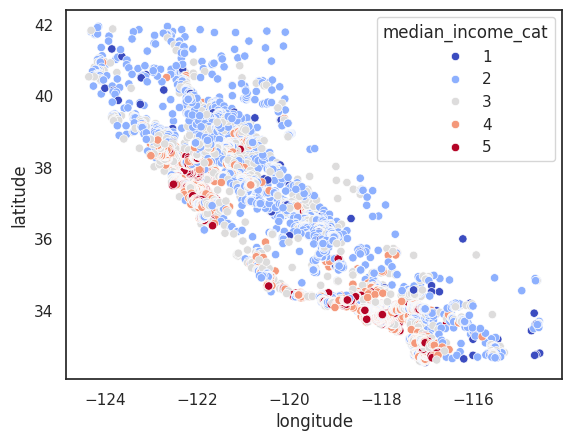

In [9]:
# Verificando o comportamento do par longitude e latitude, para cada categoria de "median_income_cat"

fig, ax = plt.subplots()

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue="median_income_cat",
    ax=ax,
    palette="coolwarm"
)

plt.show()

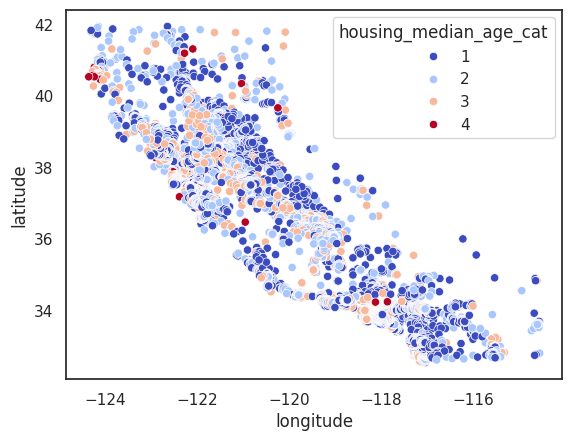

In [10]:
# Verificando o comportamento do par longitude e latitude, para cada categoria de "housing_median_age_cat"

fig, ax = plt.subplots()

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue="housing_median_age_cat",
    ax=ax,
    palette="coolwarm"
)

plt.show()

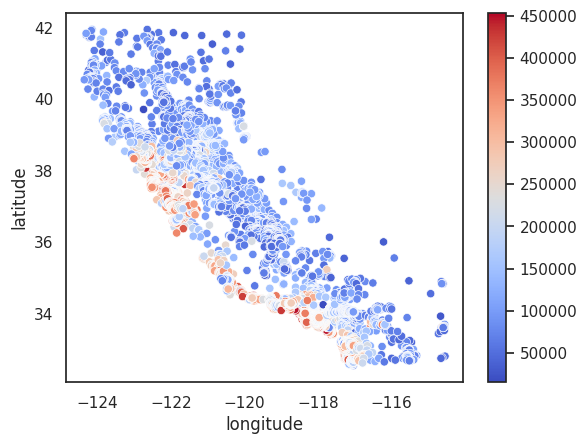

In [11]:
# Verificando o comportamento do par longitude e latitude, para a coluna alvo

norm_median_house_value = plt.Normalize(
    vmin=df["median_house_value"].min(), 
    vmax=df["median_house_value"].max()
    )
sm_median_house_value = plt.cm.ScalarMappable(
    norm=norm_median_house_value,
    cmap="coolwarm"
    )

fig, ax = plt.subplots()

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude",
    hue="median_house_value",
    ax=ax,
    palette="coolwarm"
)

ax.get_legend().remove()

fig.colorbar(mappable=sm_median_house_value, ax=ax)

plt.show()

In [12]:
# Obtendo os dados dos condados
gdf_counties = gpd.read_file(GEO_CALIFORNIA_ORIGINAL_DIR)
gdf_counties.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884..."
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7..."
2,Amador,3,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5..."
3,Butte,4,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3..."
4,Calaveras,5,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0..."


In [13]:
# Resumo da base
gdf_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   name        58 non-null     object             
 1   cartodb_id  58 non-null     int32              
 2   created_at  58 non-null     datetime64[ms, UTC]
 3   updated_at  58 non-null     datetime64[ms, UTC]
 4   geometry    58 non-null     geometry           
dtypes: datetime64[ms, UTC](2), geometry(1), int32(1), object(1)
memory usage: 2.2+ KB


In [14]:
# Removendo as colunas desnecessárias
gdf_counties = gdf_counties.drop(
    [
        "cartodb_id", 
        "created_at", 
        "updated_at"
        ], axis=1)

In [15]:
# Gerando dados geométricos da base de grupos censitários
points = [
    Point(lon, lat) for lon, lat in zip(
        df["longitude"].values, 
        df["latitude"].values
        )
        ]
points[:20]

[<POINT (-122.25 37.85)>,
 <POINT (-122.25 37.85)>,
 <POINT (-122.25 37.85)>,
 <POINT (-122.25 37.84)>,
 <POINT (-122.25 37.84)>,
 <POINT (-122.26 37.84)>,
 <POINT (-122.25 37.84)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.84)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.27 37.85)>,
 <POINT (-122.27 37.85)>,
 <POINT (-122.26 37.84)>,
 <POINT (-122.27 37.84)>,
 <POINT (-122.27 37.85)>,
 <POINT (-122.27 37.85)>,
 <POINT (-122.27 37.84)>]

In [16]:
# Obtendo os dados dos grupos censitários por geodataframe
gdf = gpd.GeoDataFrame(df, geometry=points)
gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat,geometry
0,-122.25,37.849998,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.817352,2.547945,0.184458,4,4,POINT (-122.25 37.85)
1,-122.25,37.849998,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.281853,2.181467,0.172096,3,4,POINT (-122.25 37.85)
2,-122.25,37.849998,52,919,213,413,193,4.0368,269700,NEAR BAY,4.761658,2.139896,0.231774,3,4,POINT (-122.25 37.85)
3,-122.25,37.840000,52,2535,489,1094,514,3.6591,299200,NEAR BAY,4.931907,2.128405,0.192899,3,4,POINT (-122.25 37.84)
4,-122.25,37.840000,52,3104,687,1157,647,3.1200,241400,NEAR BAY,4.797527,1.788253,0.221327,3,4,POINT (-122.25 37.84)


In [17]:
# Verificando o sistema de referencia de coordenada das bases
print(gdf.crs)
print(gdf_counties.crs)

None
EPSG:4326


In [18]:
# Convertendo a base de grupos censitários para o CRS da base dos condados
gdf = gdf.set_crs(epsg=4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# Juntando os objetos que pertencem a um dado condado
gdf_joined = gpd.sjoin(
    gdf, gdf_counties, 
    how="left", 
    predicate="within"
    )
gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat,geometry,index_right,name
0,-122.25,37.849998,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.817352,2.547945,0.184458,4,4,POINT (-122.25 37.85),0.0,Alameda
1,-122.25,37.849998,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.281853,2.181467,0.172096,3,4,POINT (-122.25 37.85),0.0,Alameda
2,-122.25,37.849998,52,919,213,413,193,4.0368,269700,NEAR BAY,4.761658,2.139896,0.231774,3,4,POINT (-122.25 37.85),0.0,Alameda
3,-122.25,37.840000,52,2535,489,1094,514,3.6591,299200,NEAR BAY,4.931907,2.128405,0.192899,3,4,POINT (-122.25 37.84),0.0,Alameda
4,-122.25,37.840000,52,3104,687,1157,647,3.1200,241400,NEAR BAY,4.797527,1.788253,0.221327,3,4,POINT (-122.25 37.84),0.0,Alameda


In [20]:
# Removendo a coluna "index_right" da base juntada
gdf_joined = gdf_joined.drop("index_right", axis=1)

In [21]:
# Resumo da base
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17340 entries, 0 to 17339
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   longitude                  17340 non-null  float32 
 1   latitude                   17340 non-null  float32 
 2   housing_median_age         17340 non-null  int8    
 3   total_rooms                17340 non-null  int16   
 4   total_bedrooms             17340 non-null  int16   
 5   population                 17340 non-null  int16   
 6   households                 17340 non-null  int16   
 7   median_income              17340 non-null  float32 
 8   median_house_value         17340 non-null  int32   
 9   ocean_proximity            17340 non-null  object  
 10  rooms_per_households       17340 non-null  float64 
 11  population_per_households  17340 non-null  float64 
 12  bedrooms_per_rooms         17340 non-null  float64 
 13  median_income_cat          1

In [22]:
# Verificando os registros com valores nulos
gdf_joined[gdf_joined.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat,geometry,name
79,-122.269997,37.790001,27,1055,347,718,302,2.6354,187500,NEAR BAY,3.493377,2.377483,0.328910,2,2,POINT (-122.27 37.79),NaN
363,-122.330002,37.889999,42,1342,291,551,266,4.5268,207400,NEAR BAY,5.045113,2.071429,0.216841,4,3,POINT (-122.33 37.89),NaN
364,-122.339996,37.880001,37,3061,930,2556,924,1.7375,350000,NEAR BAY,3.312771,2.766234,0.303822,2,3,POINT (-122.34 37.88),NaN
487,-122.290001,37.759998,18,2873,763,1243,663,5.1702,265400,NEAR BAY,4.333333,1.874811,0.265576,4,1,POINT (-122.29 37.76),NaN
507,-122.230003,37.750000,50,1542,289,654,268,3.9632,240000,NEAR BAY,5.753731,2.440299,0.187419,3,3,POINT (-122.23 37.75),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17000,-119.300003,34.270000,17,1527,503,688,423,1.6007,187500,NEAR OCEAN,3.609929,1.626478,0.329404,2,1,POINT (-119.3 34.27),NaN
17001,-119.290001,34.259998,32,3295,764,1344,600,3.6007,395500,NEAR OCEAN,5.491667,2.240000,0.231866,3,3,POINT (-119.29 34.26),NaN
17003,-119.290001,34.230000,22,2486,608,709,523,2.9018,275000,NEAR OCEAN,4.753346,1.355641,0.244570,2,2,POINT (-119.29 34.23),NaN
17034,-119.230003,34.150002,18,6213,1188,2679,1000,3.7480,380400,NEAR OCEAN,6.213000,2.679000,0.191212,3,1,POINT (-119.23 34.15),NaN


Percebe-se que existem alguns objetos sem condado relacionado. Assim, usaremos uma estratégia de imputação de valores nulos correspondente ao condado mais próximo aquela região. Isso será feito com base no centróide

In [23]:
# Gerando uma coluna correspondente ao centróide
gdf_counties["centroid"] = gdf_counties["geometry"].centroid

/tmp/ipykernel_412/2755681253.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties["centroid"] = gdf_counties["geometry"].centroid


In [24]:
def getApproachCounty(data: pd.Series, column: str):

    if pd.isna(data[column]):

        distances = gdf_counties["centroid"].distance(data["geometry"])
        less_distance_idx = distances.idxmin()

        return gdf_counties.loc[less_distance_idx][column]

    return data[column]


for column, _ in filter(lambda x: x != 0, gdf_joined.isnull().sum().items()):

    gdf_joined[column] = gdf_joined.apply(lambda x: getApproachCounty(x, column), axis=1)

/tmp/ipykernel_412/3617766126.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf_counties["centroid"].distance(data["geometry"])
/tmp/ipykernel_412/3617766126.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf_counties["centroid"].distance(data["geometry"])
/tmp/ipykernel_412/3617766126.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf_counties["centroid"].distance(data["geometry"])
/tmp/ipykernel_412/3617766126.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSer

In [25]:
# Verificando os registros nulos novamente
gdf_joined[gdf_joined.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat,geometry,name


In [26]:
# Acessando um grupo censitário especifico que não tinha condado anteriormente
gdf_joined.loc[79]

longitude                                                      -122.269997
latitude                                                         37.790001
housing_median_age                                                      27
total_rooms                                                           1055
total_bedrooms                                                         347
population                                                             718
households                                                             302
median_income                                                       2.6354
median_house_value                                                  187500
ocean_proximity                                                   NEAR BAY
rooms_per_households                                              3.493377
population_per_households                                         2.377483
bedrooms_per_rooms                                                 0.32891
median_income_cat        

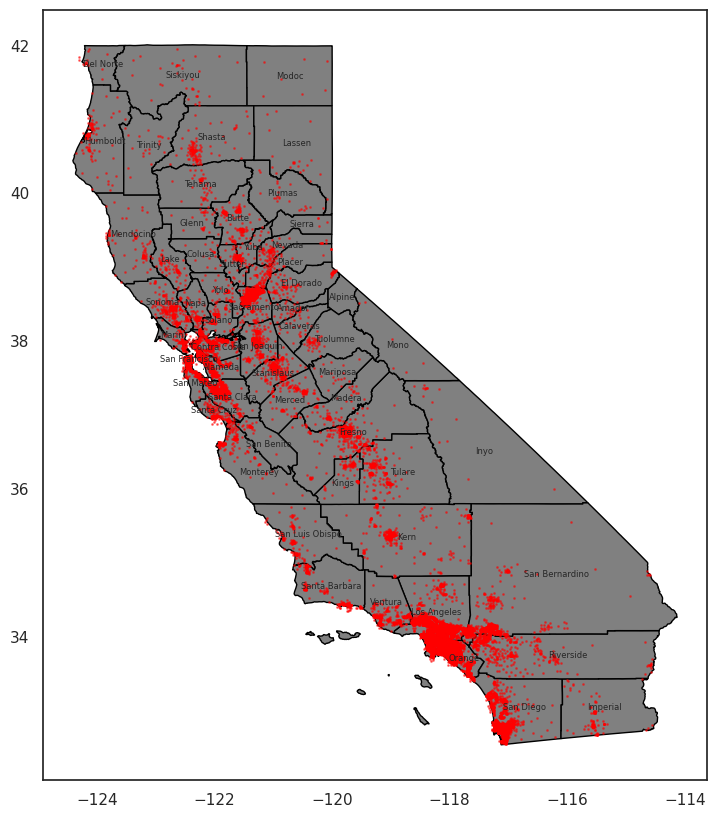

In [27]:
# Gerando mapa da califórnia

fig, ax = plt.subplots(figsize=(10, 10))

gdf_counties.plot(
    edgecolor="black",
    color="gray",
    ax=ax
)

ax.scatter(
    x=gdf_joined["longitude"],
    y=gdf_joined["latitude"],
    color="red",
    s=1,
    alpha=0.5
)

for x, y, name in zip(
    gdf_counties["centroid"].x,
    gdf_counties["centroid"].y,
    gdf_counties["name"]
):
    
    ax.text(x, y, name, fontsize=6, ha="center", va="center")

In [28]:
# Agrupando os dados numéricos de cada condado
gdf_joined.groupby("name").median(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat
name,,,,,,,,,,,,,,
Alameda,-122.169998,37.750000,39.0,1895.0,390.0,959.0,366.0,3.48390,191100.0,5.072727,2.637860,0.207163,3.0,3.0
Alpine,-119.940002,38.959999,20.0,1451.0,386.0,467.0,255.0,1.55360,212500.0,5.690196,1.831373,0.266023,2.0,2.0
Amador,-120.720001,38.419998,17.0,1783.0,347.0,730.0,288.0,3.04650,116700.0,5.932844,2.435115,0.191346,3.0,1.0
Butte,-121.605000,39.709999,23.0,1782.5,367.5,898.5,339.5,2.30520,86050.0,5.250538,2.514830,0.200243,2.0,2.0
Calaveras,-120.559998,38.200001,17.0,2715.0,551.0,1030.5,451.0,2.60420,101250.0,5.963271,2.473610,0.205163,2.0,1.0
Colusa,-122.045002,39.209999,37.0,1497.0,309.0,665.0,265.0,2.55905,70550.0,5.420579,2.854773,0.202997,2.0,3.0
Contra Costa,-122.070000,37.959999,28.0,2296.0,430.0,1103.0,418.0,4.16120,178300.0,5.608392,2.712121,0.187677,3.0,2.0
Del Norte,-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,5.523724,2.721776,0.207599,2.0,2.0
El Dorado,-120.760002,38.759998,17.0,2213.0,430.0,967.0,356.0,3.02170,128600.0,6.119891,2.650000,0.197314,3.0,1.0


In [29]:
# Juntando os dados numéricos agregados de cada condado com a base de condados

gdf_counties = gdf_counties.merge(
    gdf_joined.groupby("name").median(numeric_only=True),
    left_on="name",
    right_index=True
)
gdf_counties.head()

,name,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat
0,Alameda,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884...",POINT (-121.8854 37.64645),-122.169998,37.750000,39.0,1895.0,390.0,959.0,366.0,3.4839,191100.0,5.072727,2.637860,0.207163,3.0,3.0
1,Alpine,"POLYGON ((-120.07239 38.70277, -119.96495 38.7...",POINT (-119.82062 38.59712),-119.940002,38.959999,20.0,1451.0,386.0,467.0,255.0,1.5536,212500.0,5.690196,1.831373,0.266023,2.0,2.0
2,Amador,"POLYGON ((-121.02726 38.48925, -121.02741 38.5...",POINT (-120.65088 38.44647),-120.720001,38.419998,17.0,1783.0,347.0,730.0,288.0,3.0465,116700.0,5.932844,2.435115,0.191346,3.0,1.0
3,Butte,"POLYGON ((-121.87925 39.30361, -121.90831 39.3...",POINT (-121.60083 39.66708),-121.605000,39.709999,23.0,1782.5,367.5,898.5,339.5,2.3052,86050.0,5.250538,2.514830,0.200243,2.0,2.0
4,Calaveras,"POLYGON ((-120.87605 38.02889, -120.91875 38.0...",POINT (-120.55425 38.20452),-120.559998,38.200001,17.0,2715.0,551.0,1030.5,451.0,2.6042,101250.0,5.963271,2.473610,0.205163,2.0,1.0


In [30]:
# Agrupando os dados categóricos de cada condado
gdf_joined[["name", "ocean_proximity"]].groupby("name").describe()

ocean_proximity                         
                          count unique         top  freq
name                                                    
Alameda                     923      3    NEAR BAY   809
Alpine                        1      1      INLAND     1
Amador                       25      1      INLAND    25
Butte                       148      1      INLAND   148
Calaveras                    24      1      INLAND    24
Colusa                       16      1      INLAND    16
Contra Costa                517      3    NEAR BAY   350
Del Norte                    16      2  NEAR OCEAN    14
El Dorado                    91      1      INLAND    91
Fresno                      483      1      INLAND   483
Glenn                        26      1      INLAND    26
Humboldt                    120      3  NEAR OCEAN    88
Imperial                    107      1      INLAND   107
Inyo                         17      1      INLAND    17
Kern                        344      1      INLAND   344
Kings                        86      1      INLAND    86
Lake                         74      2      INLAND    69
Lassen                       21      1      INLAND    21
Los Angeles                4642      3   <1H OCEAN  4005
Madera                       73      1      INLAND    73
Marin                       111      3    NEAR BAY    85
Mariposa                     17      1      INLAND    17
Mendocino                    79      3   <1H OCEAN    63
Merced                      121      1      INLAND   121
Modoc                         7      1      INLAND     7
Mono                          6      1      INLAND     6
Monterey                    166      3   <1H OCEAN   123
Napa                         98      3    NEAR BAY    64
Nevada                       84      1      INLAND    84
Orange                     1284      2   <1H OCEAN  1237
Placer                       98      1      INLAND    98
Plumas                       22      1      INLAND    22
Riverside                   446      2      INLAND   409
Sacramento                  630      1      INLAND   630
San Benito                   28      2      INLAND    26
San Bernardino              694      2      INLAND   691
San Diego                  1410      3  NEAR OCEAN   924
San Francisco               449      2    NEAR BAY   365
San Joaquin                 392      1      INLAND   392
San Luis Obispo             127      3   <1H OCEAN    68
San Mateo                   311      2  NEAR OCEAN   253
Santa Barbara               263      2  NEAR OCEAN   144
Santa Clara                 798      3   <1H OCEAN   706
Santa Cruz                  184      2  NEAR OCEAN   134
Shasta                      119      1      INLAND   119
Sierra                        4      1      INLAND     4
Siskiyou                     36      1      INLAND    36
Solano                      178      2      INLAND   108
Sonoma                      301      3   <1H OCEAN   283
Stanislaus                  275      1      INLAND   275
Sutter                       56      1      INLAND    56
Tehama                       46      1      INLAND    46
Trinity                      20      1      INLAND    20
Tulare                      241      1      INLAND   241
Tuolumne                     46      1      INLAND    46
Ventura                     316      3   <1H OCEAN   174
Yolo                         71      1      INLAND    71
Yuba                         52      1      INLAND    52

In [31]:
# Agrupando a moda de ocean_proximity para cada condado
counties_ocean_prox = gdf_joined[["name", "ocean_proximity"]].groupby("name").agg(lambda x: x.mode())
counties_ocean_prox.head()

,ocean_proximity
name,
Alameda,NEAR BAY
Alpine,INLAND
Amador,INLAND
Butte,INLAND
Calaveras,INLAND


In [32]:
# Juntando os dados categóricos agregados de cada condado na base de condados
gdf_counties = gdf_counties.merge(
    counties_ocean_prox,
    left_on="name",
    right_index=True
)

In [33]:
gdf_counties.head()

,name,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_households,bedrooms_per_rooms,median_income_cat,housing_median_age_cat,ocean_proximity
0,Alameda,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884...",POINT (-121.8854 37.64645),-122.169998,37.750000,39.0,1895.0,390.0,959.0,366.0,3.4839,191100.0,5.072727,2.637860,0.207163,3.0,3.0,NEAR BAY
1,Alpine,"POLYGON ((-120.07239 38.70277, -119.96495 38.7...",POINT (-119.82062 38.59712),-119.940002,38.959999,20.0,1451.0,386.0,467.0,255.0,1.5536,212500.0,5.690196,1.831373,0.266023,2.0,2.0,INLAND
2,Amador,"POLYGON ((-121.02726 38.48925, -121.02741 38.5...",POINT (-120.65088 38.44647),-120.720001,38.419998,17.0,1783.0,347.0,730.0,288.0,3.0465,116700.0,5.932844,2.435115,0.191346,3.0,1.0,INLAND
3,Butte,"POLYGON ((-121.87925 39.30361, -121.90831 39.3...",POINT (-121.60083 39.66708),-121.605000,39.709999,23.0,1782.5,367.5,898.5,339.5,2.3052,86050.0,5.250538,2.514830,0.200243,2.0,2.0,INLAND
4,Calaveras,"POLYGON ((-120.87605 38.02889, -120.91875 38.0...",POINT (-120.55425 38.20452),-120.559998,38.200001,17.0,2715.0,551.0,1030.5,451.0,2.6042,101250.0,5.963271,2.473610,0.205163,2.0,1.0,INLAND


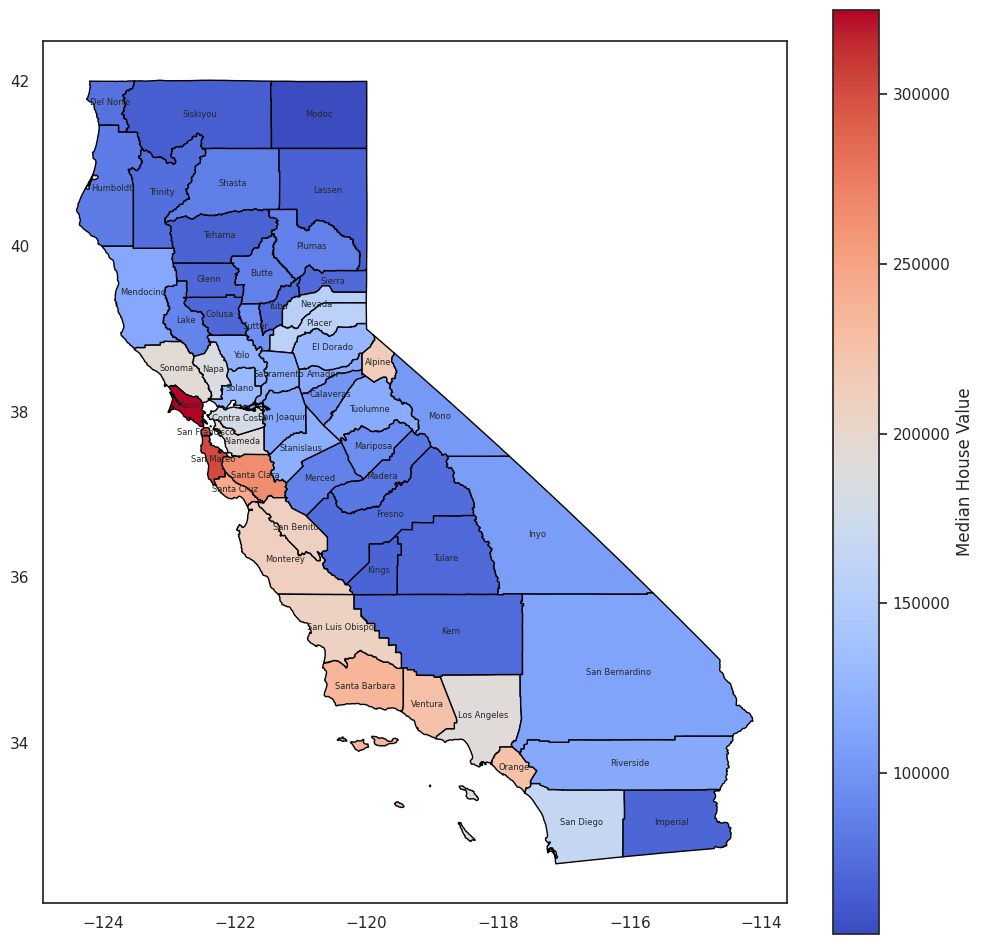

In [34]:
# Gerando novo mapa com os dados agregados para cada condado da coluna alvo

fig, ax = plt.subplots(figsize=(12, 12))

gdf_counties.plot(
    edgecolor="black",
    column="median_house_value",
    cmap="coolwarm",
    ax=ax,
)

norm_agg_median_house_value = plt.Normalize(
    vmin=gdf_counties["median_house_value"].min(),
    vmax=gdf_counties["median_house_value"].max()
)

sm_agg_median_house_value = plt.cm.ScalarMappable(
    norm=norm_agg_median_house_value,
    cmap="coolwarm",
)

fig.colorbar(
    sm_agg_median_house_value, 
    ax=ax, 
    label="Median House Value"
    )

for x, y, name in zip(
    gdf_counties["centroid"].x, 
    gdf_counties["centroid"].y, 
    gdf_counties["name"]
    ):

    ax.text(x, y, name, fontsize=6, ha="center", va="center")

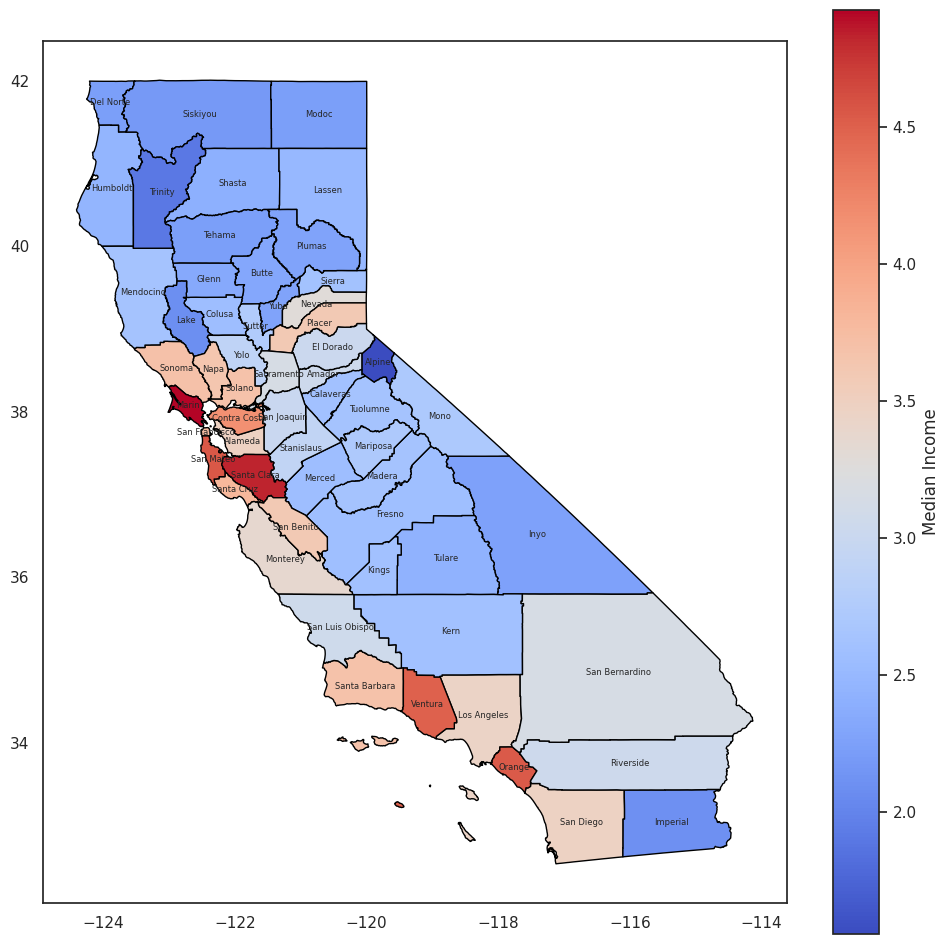

In [35]:
# Gerando novo mapa com os dados agregados para cada condado da coluna "median_income"

fig, ax = plt.subplots(figsize=(12, 12))

gdf_counties.plot(
    edgecolor="black",
    column="median_income",
    cmap="coolwarm",
    ax=ax,
)

norm_agg_median_income = plt.Normalize(
    vmin=gdf_counties["median_income"].min(),
    vmax=gdf_counties["median_income"].max()
)

sm_agg_median_income = plt.cm.ScalarMappable(
    norm=norm_agg_median_income,
    cmap="coolwarm",
)

fig.colorbar(
    sm_agg_median_income, 
    ax=ax, 
    label="Median Income"
    )

for x, y, name in zip(
    gdf_counties["centroid"].x, 
    gdf_counties["centroid"].y, 
    gdf_counties["name"]
    ):

    ax.text(x, y, name, fontsize=6, ha="center", va="center")

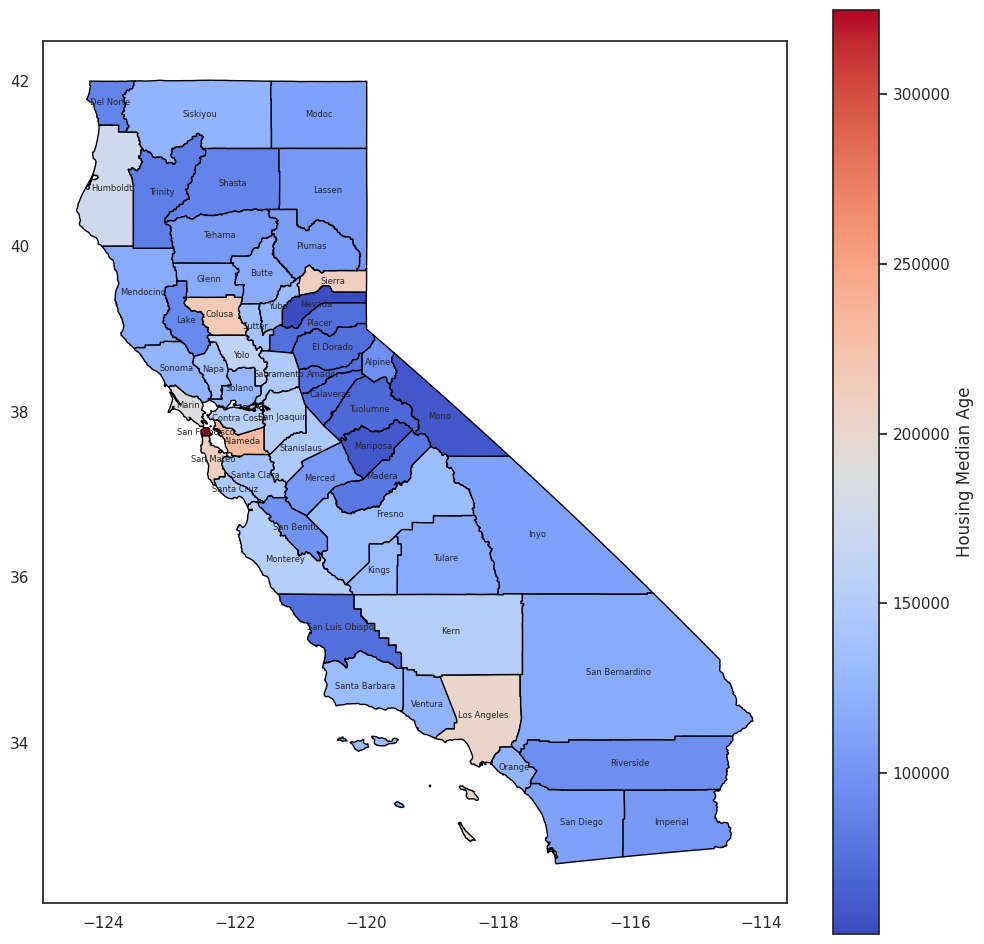

In [36]:
# Gerando novo mapa com os dados agregados para cada condado da coluna "housing_median_age"

fig, ax = plt.subplots(figsize=(12, 12))

gdf_counties.plot(
    edgecolor="black",
    column="housing_median_age",
    cmap="coolwarm",
    ax=ax,
)

norm_agg_housing_median_age = plt.Normalize(
    vmin=gdf_counties["housing_median_age"].min(),
    vmax=gdf_counties["housing_median_age"].max()
)

sm_agg_housing_median_age = plt.cm.ScalarMappable(
    norm=norm_agg_housing_median_age,
    cmap="coolwarm",
)

fig.colorbar(
    sm_agg_median_house_value, 
    ax=ax, 
    label="Housing Median Age"
    )

for x, y, name in zip(
    gdf_counties["centroid"].x, 
    gdf_counties["centroid"].y, 
    gdf_counties["name"]
    ):

    ax.text(x, y, name, fontsize=6, ha="center", va="center")

In [37]:
# Exportando a base de condados
gdf_counties.to_parquet(AGG_COUNTIES_DIR)

In [73]:
# Gerando mapa interativo

import folium.plugins


map_center = [
    df["latitude"].mean(),
    df["longitude"].mean(), 
    ]

map_size_kw = {
    "width": 500, 
    "height": 500
    }

fig = folium.Figure(**map_size_kw)

map_obj = folium.Map(
    location=map_center,
    tiles="cartodb positron",
    zoom_start=5,
    control_scale=True,
    ).add_to(parent=fig)

# Obtendo conteúdo do geojson
with open(GEO_CALIFORNIA_ORIGINAL_DIR, 'r') as fp:

    geojson_content = json.load(fp)

folium.Choropleth(
    geo_data=geojson_content,
    data=gdf_counties,
    key_on="feature.properties.name",
    columns=["name", "median_house_value"],
    name="choropleth",
    legend_name="Valor Mediano das Casas",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.3,
).add_to(map_obj)


folium.GeoJson(
    data=gdf_counties[["name", "geometry", "median_income", "median_house_value"]],
    name="geojson",
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "median_income", "median_house_value"], 
        aliases=["Condado", "Renda Mediana Anual (milhares)", "Valor Mediano da Casa"])
).add_to(map_obj)

# Controle das camadas do mapa
folium.LayerControl().add_to(map_obj)

# Popup de latitude e longitude
#folium.LatLngPopup().add_to(map_obj)

# Plugin que recebe a posição do mouse no mapa (lat e long)
folium.plugins.MousePosition().add_to(map_obj)

map_obj